<a href="https://colab.research.google.com/github/ezetimibe/machine_learning_stroke_data/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv("/content/new_income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


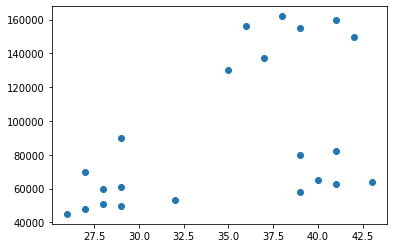

In [ ]:
plt.scatter(df['Age'], df['Income($)'])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [ ]:
km = KMeans(n_clusters=3)


In [ ]:
y_predict = km.fit_predict(df[['Age', 'Income($)']])
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

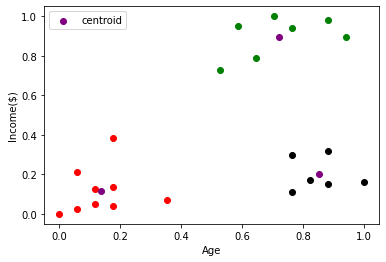

In [ ]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = 'green')
plt.scatter(df2['Age'], df2['Income($)'], color = 'red')
plt.scatter(df3['Age'], df3['Income($)'], color = 'black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = 'o', label = 'centroid' )

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2818479744366238,
 0.2187801089333045,
 0.1685851223602976,
 0.1327661931978319,
 0.10497488680620906]

Text(0, 0.5, 'Sum of squared error')

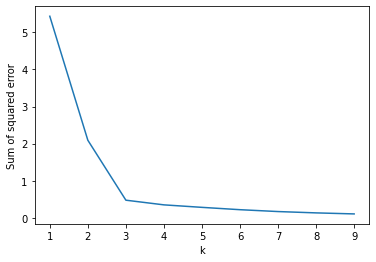

In [ ]:
plt.plot(k_rng, sse)
plt.xlabel('k')
plt.ylabel('Sum of squared error')

THE SECOND WAY, FIRST PUT DATA INTO A MATRIX

In [ ]:
feature_one = df['Age']
feature_two = df['Income($)']
x = np.matrix(list(zip(feature_one, feature_two)))
kmm = KMeans(n_clusters=3).fit(x)
labels = kmm.labels_
labels
cent = kmm.cluster_centers_
cent

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])